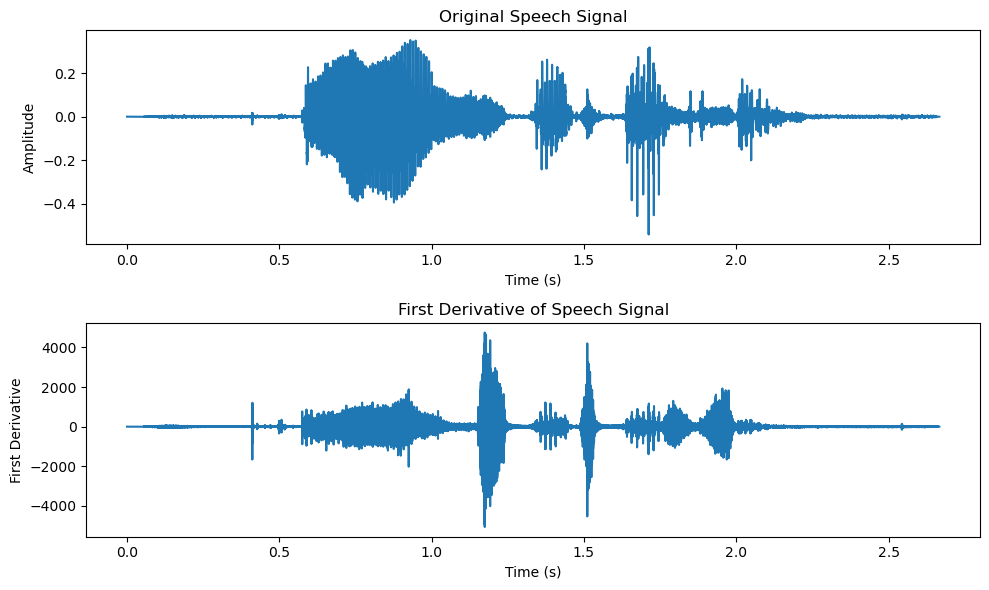

Playing original speech signal...
Playing first derivative of speech signal...


In [6]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

speech_signal, sample_rate = sf.read("C:/Users/karth/Downloads/pranave_speech.wav")
time_interval = 1 / sample_rate
first_derivative = np.diff(speech_signal) / time_interval
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(np.arange(len(speech_signal)) / sample_rate, speech_signal)
plt.title('Original Speech Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(np.arange(len(first_derivative)) / sample_rate, first_derivative)
plt.title('First Derivative of Speech Signal')
plt.xlabel('Time (s)')
plt.ylabel('First Derivative')

plt.tight_layout()
plt.show()
sf.write('first_derivative_signal.wav', first_derivative, sample_rate)

import sounddevice as sd
print("Playing original speech signal...")
sd.play(speech_signal, sample_rate)
sd.wait()

print("Playing first derivative of speech signal...")
sd.play(first_derivative, sample_rate)
sd.wait()


In [7]:
import numpy as np
import soundfile as sf
speech_signal, sample_rate = sf.read("C:/Users/karth/Downloads/pranave_speech.wav")
first_derivative, sample_rate = sf.read("first_derivative_signal.wav")

original_fft = np.fft.fft(speech_signal)
original_amplitude = np.abs(original_fft)
original_frequency = np.fft.fftfreq(len(original_fft), 1 / sample_rate)

derivative_fft = np.fft.fft(first_derivative)
derivative_amplitude = np.abs(derivative_fft)
derivative_frequency = np.fft.fftfreq(len(derivative_fft), 1 / sample_rate)

original_peak_frequency = original_frequency[np.argmax(original_amplitude)]
original_peak_amplitude = np.max(original_amplitude)
derivative_peak_frequency = derivative_frequency[np.argmax(derivative_amplitude)]
derivative_peak_amplitude = np.max(derivative_amplitude)

print("Original Speech Signal:")
print("Peak Frequency:", original_peak_frequency, "Hz")
print("Peak Amplitude:", original_peak_amplitude)

print("\nFirst Derivative of Speech Signal:")
print("Peak Frequency:", derivative_peak_frequency, "Hz")
print("Peak Amplitude:", derivative_peak_amplitude)


Original Speech Signal:
Peak Frequency: -122.25 Hz
Peak Amplitude: 922.4595555948407

First Derivative of Speech Signal:
Peak Frequency: 122.2509550855866 Hz
Peak Amplitude: 4637.557166563462


In [8]:
#2
import numpy as np
import soundfile as sf
first_derivative, sample_rate = sf.read("first_derivative_signal.wav")
zero_crossings = np.where(np.diff(np.sign(first_derivative)))[0]
zero_crossing_intervals = np.diff(zero_crossings)
threshold = 0.05 
speech_regions = zero_crossing_intervals[zero_crossing_intervals > threshold * sample_rate]
silence_regions = zero_crossing_intervals[zero_crossing_intervals <= threshold * sample_rate]
average_speech_length = np.mean(speech_regions) / sample_rate
average_silence_length = np.mean(silence_regions) / sample_rate

print("Average length between two consecutive zero crossings in speech regions:", average_speech_length, "seconds")
print("Average length between two consecutive zero crossings in silence regions:", average_silence_length, "seconds")


Average length between two consecutive zero crossings in speech regions: nan seconds
Average length between two consecutive zero crossings in silence regions: 8.230755350530346e-05 seconds


C:\Users\karth\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\karth\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [18]:
#3
import soundfile as sf
import sounddevice as sd
your_speech_signal, sample_rate = sf.read("C:/Users/karth/Downloads/audio2.wav")
teammate_speech_signal, sample_rate = sf.read("C:/Users/karth/Downloads/shreya_2.wav")
your_speech_length = len(your_speech_signal) / sample_rate
teammate_speech_length = len(teammate_speech_signal) / sample_rate
print("Your speech signal length:", your_speech_length, "seconds")
print("Teammate's speech signal length:", teammate_speech_length, "seconds")
print("Playing your speech signal...")
sd.play(your_speech_signal, sample_rate)
sd.wait()
print("Playing teammate's speech signal...")
sd.play(teammate_speech_signal, sample_rate)
sd.wait()

Your speech signal length: 7.082666666666666 seconds
Teammate's speech signal length: 7.296 seconds
Playing your speech signal...
Playing teammate's speech signal...


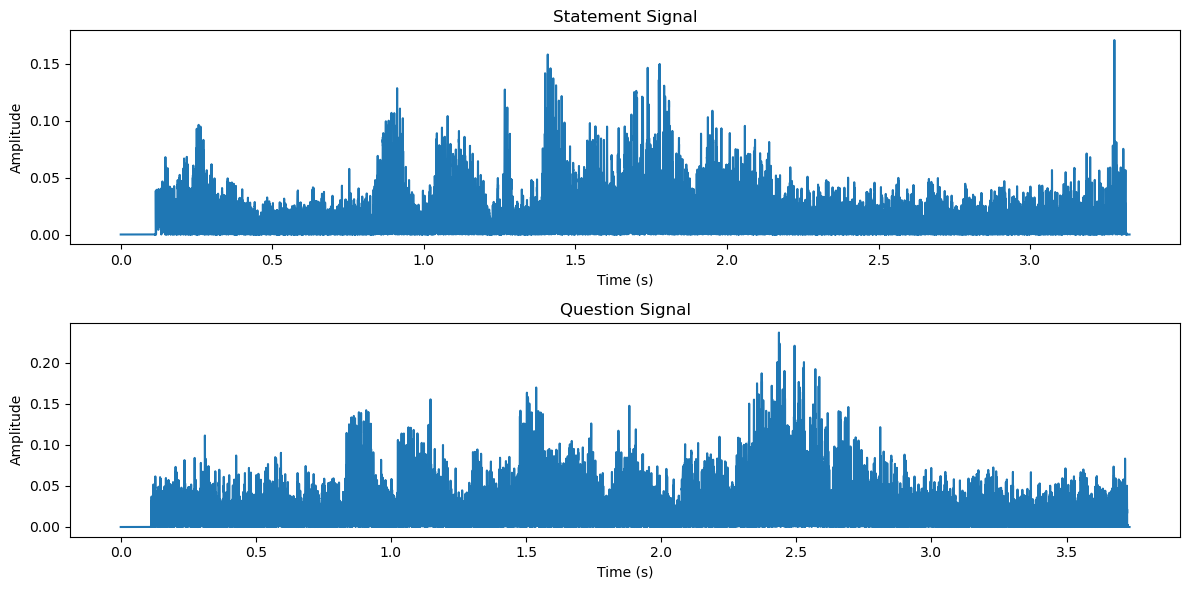

Dominant frequency of statement signal: 103.96634615384615 Hz
Dominant frequency of question signal: -126.16071428571428 Hz


In [17]:
#4
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
statement_signal, sample_rate = sf.read("C:/Users/karth/Downloads/Statement.wav")
question_signal, sample_rate = sf.read("C:/Users/karth/Downloads/question.wav")
def calculate_amplitude_frequency(signal, sample_rate):
    time = np.arange(len(signal)) / sample_rate
    amplitude = np.abs(signal)
    fft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(signal), 1/sample_rate)
    dominant_freq_index = np.argmax(np.abs(fft_result))
    dominant_freq = freqs[dominant_freq_index]
    
    return time, amplitude, freqs, fft_result, dominant_freq
statement_time, statement_amplitude, statement_freqs, statement_fft, statement_dominant_freq = calculate_amplitude_frequency(statement_signal, sample_rate)
question_time, question_amplitude, question_freqs, question_fft, question_dominant_freq = calculate_amplitude_frequency(question_signal, sample_rate)
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(statement_time, statement_amplitude)
plt.title('Statement Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(question_time, question_amplitude)
plt.title('Question Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()
print("Dominant frequency of statement signal:", statement_dominant_freq, "Hz")
print("Dominant frequency of question signal:", question_dominant_freq, "Hz")
